Shape: (259, 7)
         Date        Open        High         Low       Close   Adj Close  \
0  2023-04-20  166.169998  169.699997  160.559998  162.990005  162.990005   
1  2023-04-21  164.800003  166.000000  161.320007  165.080002  165.080002   
2  2023-04-24  164.649994  165.649994  158.610001  162.550003  162.550003   
3  2023-04-25  159.820007  163.470001  158.750000  160.669998  160.669998   
4  2023-04-26  160.289993  160.669998  153.139999  153.750000  153.750000   

      Volume  
0  210970800  
1  123539000  
2  140006600  
3  121999300  
4  153364100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       259 non-null    object 
 1   Open       259 non-null    float64
 2   High       259 non-null    float64
 3   Low        259 non-null    float64
 4   Close      259 non-null    float64
 5   Adj Close  259 non-null    float64
 6   Vo

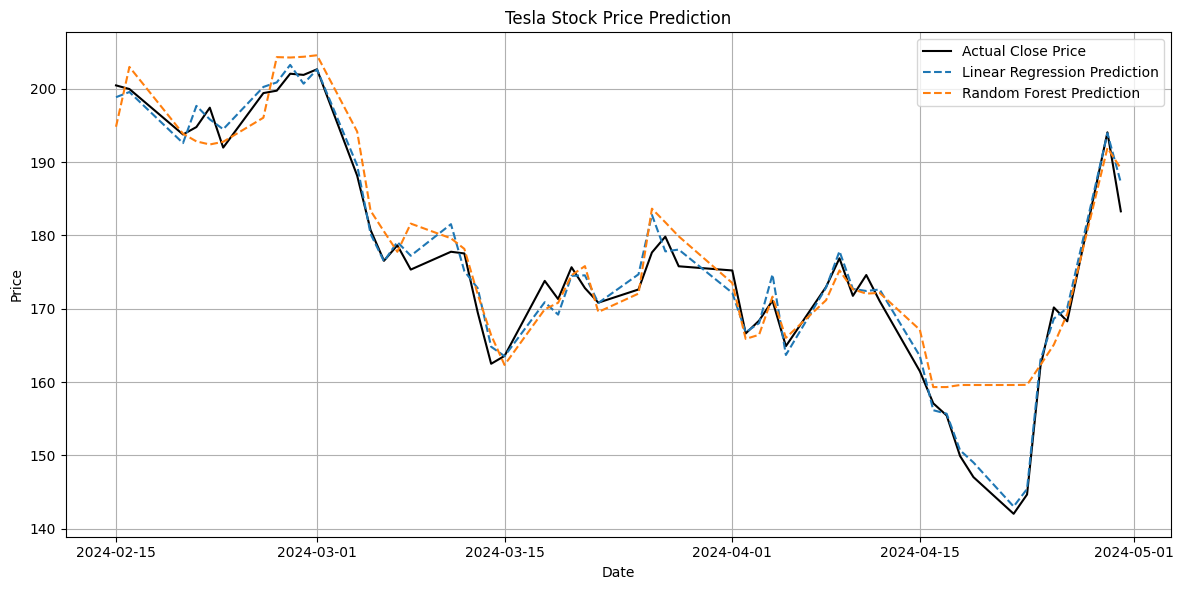

Shape: (259, 7)
        date        open        high         low       close   adj_close  \
0 2023-04-20  166.169998  169.699997  160.559998  162.990005  162.990005   
1 2023-04-21  164.800003  166.000000  161.320007  165.080002  165.080002   
2 2023-04-24  164.649994  165.649994  158.610001  162.550003  162.550003   
3 2023-04-25  159.820007  163.470001  158.750000  160.669998  160.669998   
4 2023-04-26  160.289993  160.669998  153.139999  153.750000  153.750000   

      volume  
0  210970800  
1  123539000  
2  140006600  
3  121999300  
4  153364100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       259 non-null    datetime64[ns]
 1   open       259 non-null    float64       
 2   high       259 non-null    float64       
 3   low        259 non-null    float64       
 4   close      259 non-null    float64       
 5  

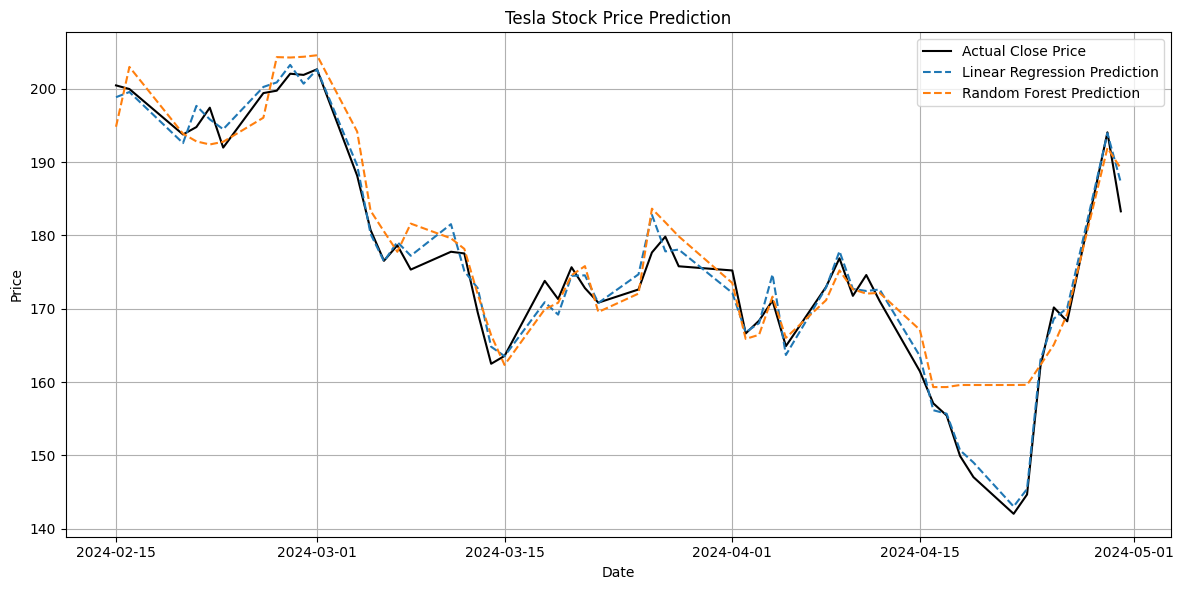

In [11]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load Dataset
file_path = ''  # Upload your CSV file
df = pd.read_csv('/content/Tesla (20.04.23 - 01.05.24).csv')

# Step 3: Inspect Dataset
print("Shape:", df.shape)
print(df.head())
print(df.info())

# Step 4: Preprocessing
# Rename columns for easier access if needed
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Drop any nulls
df.dropna(inplace=True)

# Step 5: Feature Engineering
# We'll predict 'close' price based on previous features
features = ['open', 'high', 'low', 'volume']
target = 'close'

X = df[features]
y = df[target]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 6: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Step 7: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Step 8: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['date'].iloc[-len(y_test):], y_test.values, label='Actual Close Price', color='black')
plt.plot(df['date'].iloc[-len(y_test):], lr_preds, label='Linear Regression Prediction', linestyle='--')
plt.plot(df['date'].iloc[-len(y_test):], rf_preds, label='Random Forest Prediction', linestyle='--')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("Shape:", df.shape)
print(df.head())
print(df.info())

# Step 4: Preprocessing
# Rename columns for easier access if needed
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Drop any nulls
df.dropna(inplace=True)

# Step 5: Feature Engineering
# We'll predict 'close' price based on previous features
features = ['open', 'high', 'low', 'volume']
target = 'close'

X = df[features]
y = df[target]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 6: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Step 7: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Step 8: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['date'].iloc[-len(y_test):], y_test.values, label='Actual Close Price', color='black')
plt.plot(df['date'].iloc[-len(y_test):], lr_preds, label='Linear Regression Prediction', linestyle='--')
plt.plot(df['date'].iloc[-len(y_test):], rf_preds, label='Random Forest Prediction', linestyle='--')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
